In [7]:
import sys
sys.path.append('../../../vysxd')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from vysxd_define import *
from vysxd_analysis import *

%matplotlib inline

In [8]:
# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3/MS/DENSITY/electrons/charge/')
# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1/MS/DENSITY/electrons/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1_sin2driver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.3_vth-0.1_sin2driver/MS/DENSITY/electrons/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.11_sin2driver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.11_sin2driver/MS/DENSITY/electrons/charge/')

# e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.05_sin2driver/MS/FLD/e1/')
# edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('./klD-0.33_vth-0.05_sin2driver/MS/DENSITY/electrons/charge/')

e1_D_xt, dt, dx, t, x = get_osiris_quantity_1d('EPW-alves/MS/FLD/e1/')
edens_D_xt, dt, dx, t, x = get_osiris_quantity_1d('EPW-alves/MS/DENSITY/electrons/charge/')
p1x1 = vysxd_get_data('EPW-alves/MS/PHA/p1x1/electrons/p1x1-electrons-000100.h5')

In [85]:
np.shape(p1x1.DATA)
print(len(p1x1.Y))
print(len(p1x1.X))
phasearray = p1x1.DATA
phasearray[127,95]

v_p = p1x1.Y
x_p = p1x1.X

#n_v = np.linspace(0, len(v_p)-1,len(v_p))
#n_v = n_v.astype(int)
#n_v = n_v.tolist()
#print(n_v)

def position_averaged_f_v(array):
    n_v = np.linspace(0, len(v_p)-1,len(v_p))
    n_v = n_v.astype(int)
    n_v = n_v.tolist()
    n_x = np.linspace(0, len(x_p)-1,len(x_p))
    n_x = n_x.astype(int)
    n_x = n_x.tolist()
    PAV = []
    for i in n_v:
        integral = np.trapz(array[i,n_x], x_p)
        PAV.append(integral)
    return PAV

v_input = v_p.tolist()
v_ave = v_input[3:-3]

def coarse_grained_in_v(array):
    v_input = v_p.tolist()
    v_ave = v_input[3:-3]
    CGF = np.zeros([128,96])
    CGF += array
    for i in range(0,len(v_ave)):
        for j in range(0,len(x_p)):
            coarse_grain = (1/7)*(0.3*array[i,j]+array[i+1,j]+1.4*array[i+2,j]+1.6*array[i+3,j]+1.4*array[i+4,j]+array[i+5,j]+0.3*array[i+6,j])
            CGF[i+3,j] = coarse_grain
    return CGF

def gradv_ave(array):
    v_input = v_p.tolist()
    v_ave = v_input[3:-3]
    GVA = np.zeros([128,96])
    for i in range(0,len(x_p)):
        gradv = np.gradient(array[:,i])
        GVA[:,i] = gradv
    return GVA


128
96


128

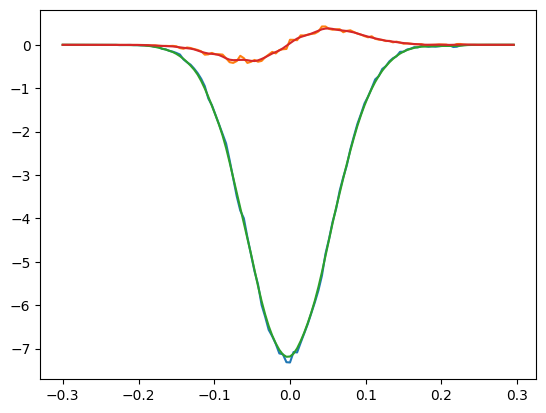

In [86]:
P = coarse_grained_in_v(phasearray)
gradP = gradv_ave(P)
v_input = v_p.tolist()
v_ave = v_input[3:-3]
#print(P)
#plt.plot(v_p,position_averaged_f_v(phasearray))
#plt.plot(v_p,phasearray[:,80])
#plt.plot(v_p,np.gradient(phasearray[:,80]))
#phasearray[70,:]
plt.plot(v_p,phasearray[:,80])
plt.plot(v_p,np.gradient(phasearray[:,80]))
plt.plot(v_p,P[:,80])
plt.plot(v_p,gradP[:,80])

len(np.gradient(P[:,80]))